# Predicting Bike Rentals
## Introduction
Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

## Data set
Here are the descriptions for the relevant columns:
- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
bike_rentals = pd.read_csv('hour.csv')
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<AxesSubplot:>

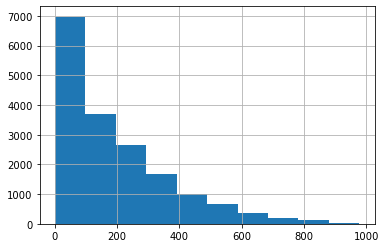

In [4]:
bike_rentals['cnt'].hist()

In [5]:
corr_ = bike_rentals.corr()[['cnt']].sort_values('cnt', ascending = False)

corr_

,cnt
cnt,1.000000
registered,0.972151
casual,0.694564
temp,0.404772
atemp,0.400929
hr,0.394071
instant,0.278379
yr,0.250495
season,0.178056
mnth,0.120638


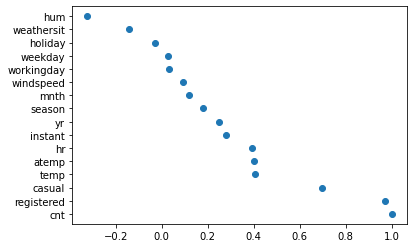

In [6]:
plt.scatter(y = corr_.index, x = corr_)
plt.show()

In [7]:
def assign_label(hour):
    if hour < 6:
        return 4
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [8]:
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [9]:
features = list(train.columns)
features.remove('cnt')
features.remove('casual')
features.remove('registered')
features.remove('dteday')
features.remove('instant')

features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

## Linear Regression

In [10]:
model = LinearRegression()
model.fit(train[features], train['cnt'])
predictions = model.predict(test[features])
mse = mean_squared_error(predictions, test['cnt'])
mse

17327.29417053474

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.
## Decision Tree

In [11]:
model = DecisionTreeRegressor(min_samples_leaf = 5)
model.fit(train[features], train['cnt'])
predictions = model.predict(test[features])
mse = mean_squared_error(predictions, test['cnt'])
mse

2965.3882677230845

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.
## Random Forest

In [12]:
model = RandomForestRegressor(min_samples_leaf = 5)
model.fit(train[features], train['cnt'])
predictions = model.predict(test[features])
mse = mean_squared_error(predictions, test['cnt'])
mse

2231.423453369563

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.